# Deep Learning with Python

In this notebook, we will explore the basics of deep learning:
* **Multilayer Perceptrons**
    - Feedforward neural networks
    - Using Keras models with Scikit-Learn for general ML
* **Advanced Multilayer Perceptrons**
    - Further details on using Keras
    - Saving models (Network Serialization), Keep best models (Checkpointing)
    - Reduce overfitting with Dropout Regularization
    - Lift performance with Learning Rate Schedules
* **CNN**
    - CNN Basics
    - Improve model performance with Image Augmentation

In [1]:
# Install necessary deep learning libraries in our environment first

# conda install -c conda-forge tensorflow
# pip install keras

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Note: Keras only needs either Theano or Tensorflow
# Theano developed by University of Montreal, Tensorflow developed by Google

from platform import python_version

print(python_version())

# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

# check deep learning version numbers
# theano
import theano
print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

3.8.10
scipy: 1.6.2
numpy: 1.20.2
matplotlib: 3.3.4
pandas: 1.2.4
statsmodels: 0.12.0
sklearn: 0.23.2
theano: 1.0.4
tensorflow: 2.3.0
keras: 2.4.3


### TensorFlow

Computation is described in terms of data flow and operations in the structure of a directed graph.

**Simple Tensorflow example**

* Nodes: Nodes perform computation and have zero or more inputs and outputs. Data that moves between nodes are known as tensors, which are multi-dimensional arrays of real values.
* Edges: The graph defines the flow of data, branching, looping and updates to state. Special edges can be used to synchronize behavior within the graph, for example waiting for computation on a number of inputs to complete.
* Operation: An operation is a named abstract computation which can take input attributes and produce output attributes. For example, you could define an add or multiply operation.


In [8]:
# Simple Example of TensorFlow library
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# declare two symbolic floating-point scalars
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# create a simple symbolic expression using the add function
add = tf.add(a, b)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
sess = tf.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print(c)


4.0


### Keras
Keras is a minimalist Python library for deep learning that can run on top of Theano or TensorFlow. Developed and mainted by Google Engineer Francois Chollet using 4 guiding principles:

* Modularity: A model can be understood as a sequence or a graph alone. All the concerns of a deep learning model are discrete components that can be combined in arbitrary ways.
* Minimalism:The library provides just enough to achieve an outcome, no frills and maximizing readability.
* Extensibility: New components are intentionally easy to add and use within the framework, intended for developers to trial and explore new ideas.
* Python: No separate model files with custom file formats. Everything is native Python.

**Overview of construction of DL models in Keras:**
1. **Define your model.** Create a Sequential model and add configured layers.
2. **Compile your model.** Specify loss functions and optimizers and call the compile() function on the model.
3. **Fit your model.** Train the model on a sample of data by calling the fit() function on the model.
4. **Make predictions.** Use the model to generate predictions on new data by calling functions such as evaluate() or predict() on the model.

## Multilayer Perceptrons
* Multilayer Perceptrons
* Neurons, Weights and Activations
* Networks of Neurons
* Training Networks

**Multilayer Perceptrons**
* Often called: Artificial Neural Networks, Neural Networks, Multilayer Perceptrons
* A Perceptron is a single neuron model that is a precursor to larger neural networks
* Power of NNs come from their ability to learn the representation in the training data and how to best relate it to the output variable that you want to predict.
* NNs learn a mapping.
* Predictive capability of NNs comes from the hierarchical or multilayered structure of the networks which can pick out (learn to represent) features at different scales or resolutions and combine them into higher-order features. eg. From lines, to collections of lines, to shapes.

**Neurons - Neurons**
* Building blocks for NNs
* Simple computational units that have weighted input signals and produce an output signal using an activation function

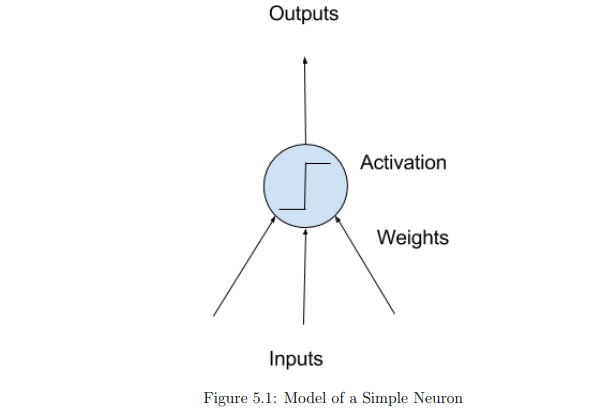

**Neuron - Weights**
* Weights are like coefficients used in a regression equation
* There is 1 weight for each input, and 1 for the bias on the Neuron itself. (eg. If 2 inputs, then 3 weights in total)
* Weights often initialized to small random values like 0 to 0.3
* Larger weights means increased complexity and fragility of the model
* Desirable to keep weights in network small, and we can do it through regularization techniques

**Neurons - Activation Function**
* Weighted inputs are summed and passed through an activation function (sometimes called transfer function)
* Activation function is simple mapping of summed weighted input to the output of the neuron
* 'Activation' because it governs the threshold at whichi the neuron is activated and the strength of the output signal
* Traditionally non-linear functions are used, allowing the network to combine inputs in more complex ways and in turn provide richer capability in the functions they can model
* Logistic Function (sigmoid function) - output value between 0 and 1 with s-shaped distribution
* Hyperbolic tangent function (Tanh) - output value between -1 to +1 with s-shaped distribution
* More recently, rectifier activation function has been shown to provide better results

**Networks of Neurons - Network**
* Neurons are arranged into networks
* A row of neurons is called a layer, and 1 network can have multiple layers
* Architecture of neurons in network is called network topology

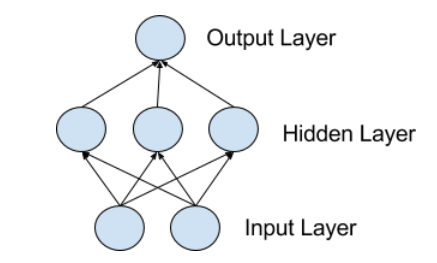

**Networks of Neurons - Input/ Visible layers**
* Bottom layer takes input, is called visible layer (it is exposed part of network)
* Often, a NN is drawn with the visible layer having 1 neuron per input value/ column in dataset
* These are not the neurons as described above, but they  just pass the input value through to the next layer

**Networks of Neurons - Hidden Layers**
* After input layer is hidden layers (not directly exposed to input)
* Simplest network structures is to have a single neuron in the hidden layer that directly outputs the value
* With advances, Deep Learning can refer to having many hidden layers in our NN
* 'Deep' because in the past it be VERY slow to train, but with technology advances, now it takes minutes/seconds

**Networks of Neurons - Output Layer**
* Final hidden layer is called output layer
* Responsible for outputting a value or vector of values that correspond to the format required for the problem
* Choice of activation function in output layer is strongly constrained by type of problem we are modelling:
    - Regression: Single output neuron, and neuron may have no activation function
    - Binary classification:Single output neuron, use sigmoid activation function to output value between 0 and 1 to represent probability of predicting a value for primary class. Can be further turned into crisp class values using thresholds (0.5 or etc)
    - Multiclass classification: May have multiple neurons in output layer, 1 for each class. Softmax activation function may be used to output probability of network predicting each of the class values. Output with highest probability can be chosen to produce a crisp class classification value.

**Training Networks - Data Preparation**
* Data must be numerical
* Categorical data needs to be one-hot encoded
* Output variable can also be one-hot encoded in classification problems with more than 1 class. This makes it easy to directly compare to the output of the neuron in the network's output layer (it outputs 1 value for each class).
* NNs require input to be scaled in consistent way
* Normalization - rescale to between 0 and 1
* Standardization - change distribution to mean 0 and SD 1
* Scaling also applies to image pixel data
* Words can be converted to integers such as frequency rank of word in dataset or other encoding techniques

**Training Networks - Stochastic Gradient Descent**
* Classical and still preferred training algorithm for NN
* 1 row of data exposed to network at a time as input
* **Forward Pass** - Network processes that 1 row of input through the hidden layer, to the output layer. This is also the type of pass that is used after network is trained, to make predictions on new data.
* **Back Propogation** - Output of network is compared to expected output and error is calculated. Error is propogated back through the network, 1 layer at a time, and weights are updated according to amount that they contributed to the error.
* **Epoch** - Process (Forward Pass + Back propogation) is repeated for all examples in training data. 1 round of this process of updating the network for entire training dataset is called an Epoch. Network may be trained for tens/hundreds/thousands of Epochs.

**Training Networks - Weight Updates**
* Online Learning
    - Weights updated from errors calculated *for each training example*
    - Fast, but chaotic changes to network
* Batch Learning
    - Errors saved up across all training examples, and network updated at the end (your batch size can vary)
    - More stable
* Size of batch (number of examplse network is shown before an update) is often reduced to small number such as tens or hundreds of examples for computational efficiencies.
* Learning Rate/ Step Size: Amount that weights are updated or changed for a given error. Often, small learning rates (0.1, 0.001 or smaller) are used.
* Momentum - incorporates properties from previous weight update allowing weights to continue to change in same direction even when less error is being calculated.
* Learning Rate Decay - used to decrease learning rate over Epochs to allow network to make large changes to weights at beginning, and smaller fine tuning changes later in the training schedule.

**Predictions**
* After NN is trained, we can make predictions on test or validation data to estimate the skill of the model
* The network topology and final set of weights is all that we need to save from the model
* Predictions are made by providing input to network and performing a forward-pass allowing it to generate an output that we use as a prediction